In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from pandas import DataFrame,Series
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
import seaborn as sns # plotting library
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from pycaret.regression import *
from sklearn import preprocessing
import seaborn as sn

In [22]:
df = pd.read_csv("covidweather.csv")
df2 = pd.read_csv("covidweather.csv")
df = df.drop(columns = ['UID','Date','County', 'State', 'New Deaths', 'New Cases', 'Cases'])
df2 = df2.drop(columns = ['UID','Date','County', 'State', 'Deaths', 'New Cases', 'Cases'])
df

,Population,Lat,Long,temp,humidity,windspeed,Deaths,Age-65,Income-PC
0,658573,33.555547,-86.895063,12.5,44.47,28.8,0,16.3,32098
1,658573,33.555547,-86.895063,14.4,85.83,19.0,0,16.3,32098
2,658573,33.555547,-86.895063,18.8,82.40,24.0,0,16.3,32098
3,658573,33.555547,-86.895063,13.3,90.78,14.5,0,16.3,32098
4,658573,33.555547,-86.895063,11.1,89.99,19.4,0,16.3,32098
...,...,...,...,...,...,...,...,...,...
35035,99500,41.307025,-104.688750,-13.2,68.00,26.9,273,16.5,35190
35036,99500,41.307025,-104.688750,-10.6,65.60,21.5,273,16.5,35190
35037,99500,41.307025,-104.688750,-6.9,45.00,22.6,273,16.5,35190
35038,99500,41.307025,-104.688750,2.5,27.10,37.1,273,16.5,35190


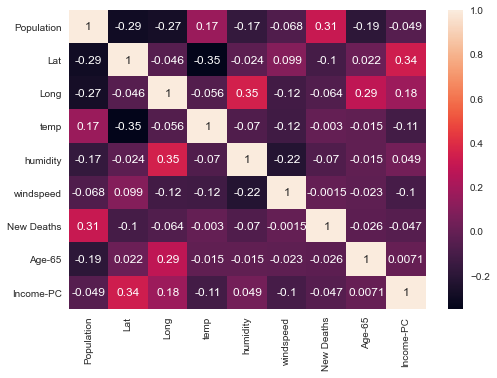

In [23]:
corrMatrix = df2.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
#drop new deaths
df = df.drop(columns = ['New Deaths'])

In [29]:
caret_df = setup(data = df, target = 'Deaths', session_id=55, train_size = 0.8, remove_outliers = True)


,Description,Value
0,session_id,55
1,Target,Deaths
2,Original Data,"(35040, 9)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(26630, 8)"


In [30]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,708.0614,1475335.0029,1213.9480,0.7374,1.7148,12.5395,0.0840
gbr,Gradient Boosting Regressor,719.9056,1505410.0789,1226.5041,0.7321,1.7288,13.4216,0.3590
rf,Random Forest Regressor,704.6691,1555748.0360,1246.4378,0.7230,1.6919,11.8718,1.0620
xgboost,Extreme Gradient Boosting,711.3815,1561490.6250,1248.7700,0.7222,1.7137,11.9892,0.5290
et,Extra Trees Regressor,710.6636,1638561.7218,1279.1850,0.7082,1.6919,11.4298,0.6620
knn,K Neighbors Regressor,715.4084,1655031.8125,1285.4532,0.7056,1.6960,11.8940,0.0170
ada,AdaBoost Regressor,834.8010,1842515.7134,1356.7299,0.6724,1.8594,14.3538,0.0640
lr,Linear Regression,916.4717,2260727.1375,1502.5738,0.5985,1.9533,15.0151,0.0090
lasso,Lasso Regression,916.4168,2260727.2875,1502.5738,0.5985,1.9532,15.0135,0.0170
ridge,Ridge Regression,916.4720,2260726.7625,1502.5737,0.5985,1.9533,15.0151,0.0090


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=55, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [31]:
reg = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,688.1609,1343727.2121,1159.1925,0.7603,1.7083,12.3600
1,698.7123,1449634.6824,1204.0078,0.7436,1.7127,13.5959
2,678.2289,1319192.7014,1148.5611,0.7620,1.6967,13.7925
3,716.3540,1556167.3572,1247.4644,0.7123,1.8236,14.6366
4,751.5243,1630111.9895,1276.7584,0.7356,1.7407,15.0844
5,686.7570,1371532.1927,1171.1243,0.7561,1.6629,12.3408
6,717.9997,1482714.5957,1217.6677,0.7355,1.7162,13.1951
7,697.6663,1484829.9779,1218.5360,0.7044,1.6983,10.4806
8,710.0897,1563612.0325,1250.4447,0.7150,1.6474,9.0549
9,735.1207,1551827.2877,1245.7236,0.7494,1.7411,10.8538


In [32]:
model = tune_model(reg)
print(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,690.7364,1356932.7940,1164.8746,0.7579,1.6999,12.7310
1,699.7465,1437010.0743,1198.7536,0.7458,1.7135,13.9806
2,680.4497,1332023.3100,1154.1331,0.7597,1.6971,13.3610
3,717.2597,1537693.3543,1240.0376,0.7157,1.8197,14.7312
4,756.2258,1651956.3984,1285.2846,0.7321,1.7397,15.0304
5,686.5829,1348561.3263,1161.2757,0.7602,1.6638,12.7991
6,727.3193,1524970.5922,1234.8970,0.7279,1.7221,13.1776
7,704.0582,1474331.3088,1214.2205,0.7065,1.7094,10.2367
8,708.2771,1533980.1376,1238.5395,0.7204,1.6490,8.9529
9,737.9000,1557377.6482,1247.9494,0.7485,1.7355,10.6427


LGBMRegressor(bagging_fraction=0.8, bagging_freq=0, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
              importance_type='split', learning_rate=0.2, max_depth=-1,
              min_child_samples=56, min_child_weight=0.001, min_split_gain=0.5,
              n_estimators=250, n_jobs=-1, num_leaves=10, objective=None,
              random_state=55, reg_alpha=0.0001, reg_lambda=0.005, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [33]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…